## Assignment 12 Data Science Ali Adnan(aa05432@st.habib.edu.pk)

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Q1)

In [2]:
df = pd.read_csv('C:\\Users\\Ali Adnan\\Downloads\\btc-market-price.csv', parse_dates=['Date'])


In [3]:
furniture = df.set_index('Date')
furniture.index

DatetimeIndex(['2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
               '2021-04-02', '2021-04-03',
               ...
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [4]:
month_data = furniture['Market_Price'].resample('MS').mean()

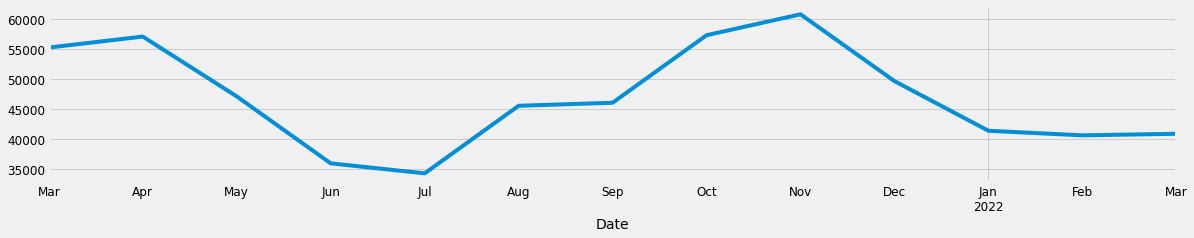

In [5]:
month_data.plot(figsize=(18, 3))
plt.show()

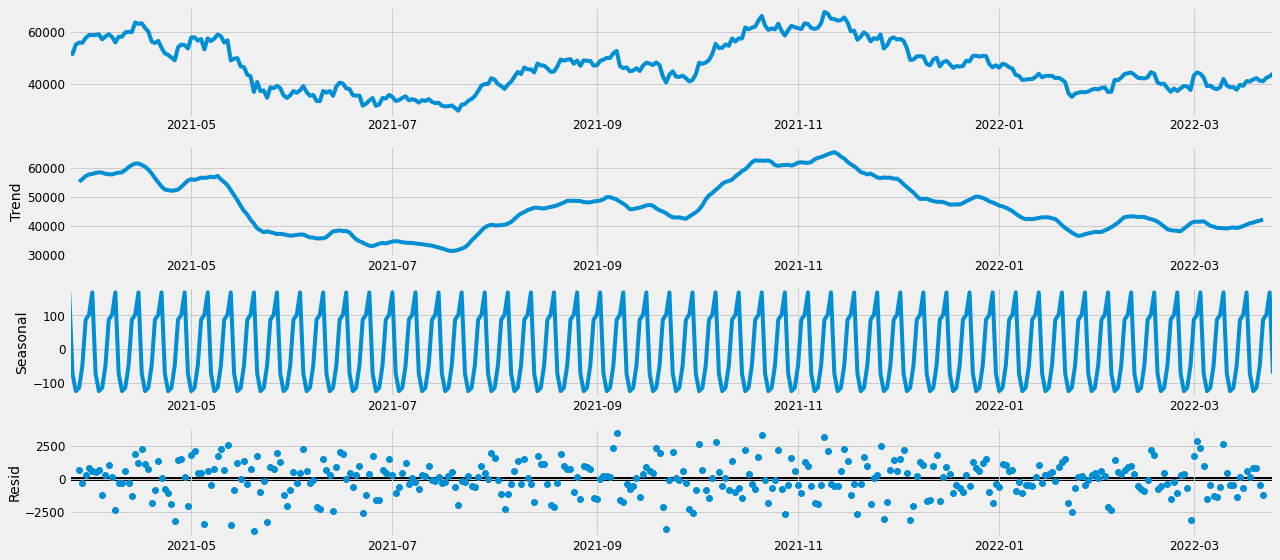

In [6]:
decomposition = sm.tsa.seasonal_decompose(furniture, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

## As we can see from the graphs plotted above, there's a downwards trend starting from 2021-04 to 2021-07, then we can observe an upwards trend from 2021-07 to 2021-11 which is then followed by a downwards trend till 2022-03. By interpreting this trend, we can deduce that the value of bitcoin is really volatile and unpredictable, it's always changing due to many market factors. The price initially fell then rose to an all time high and then dropped because a lot of people cash out when the price is high. The resid graph shows us that if the dot is close to the line, the data is accurate and vice versa. So we can see that the data is accurate the 2021-05, 2021-010 and in the first few months of 2022 whereas it's inaccurate in 2021-11

## Q2)

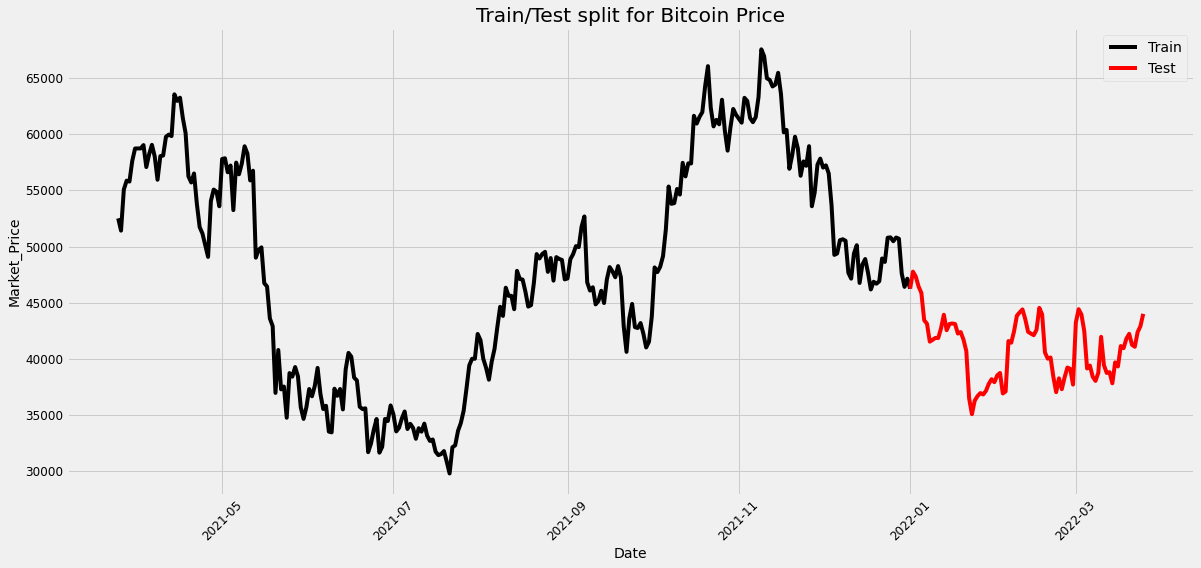

In [7]:
train = furniture[furniture.index <= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = furniture[furniture.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price")
plt.legend()
plt.show()

## As we can see from the graph, the black line represents the training data and the red line represents the testing data. It represents high volatility in the price of bitcoin

## Q3)

In [8]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


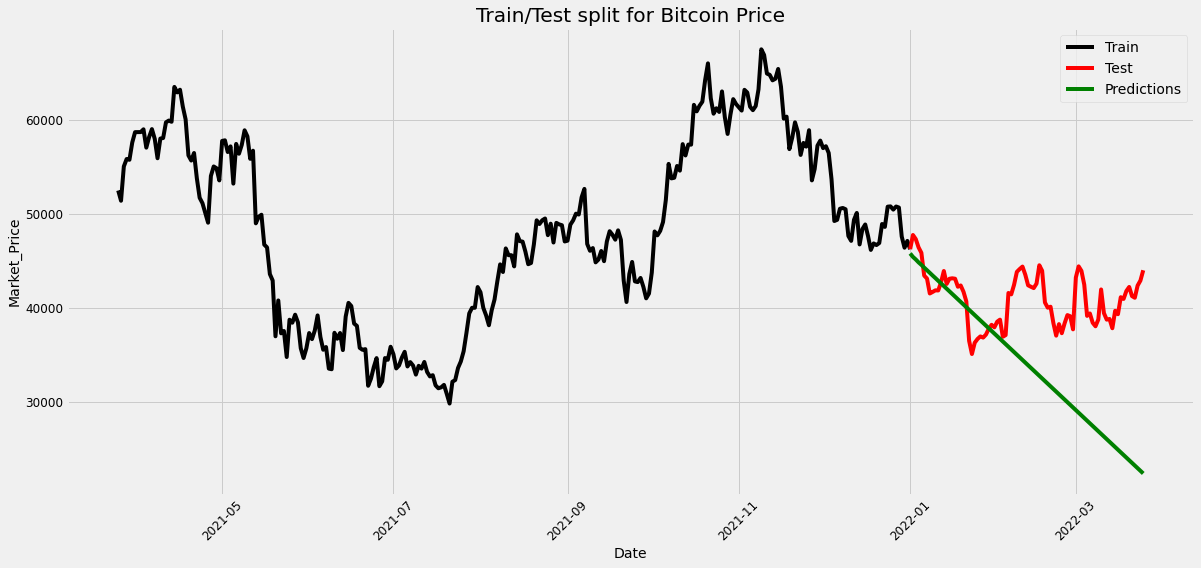

RMSE:  9647.170548490969


In [9]:
ARIMAmodel = ARIMA(train, order = (3, 2, 3))

ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting

y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

## As we can see from the graph above, the prediction is completely inaccurate since the RMSE value is really high, being 2724.4. I put 1,0,1 as the order as well which gave me a higher value which was around 5000. The prediction actually shows a mirror image of the testing data which shows how inaccurate the graph is.

## Q4)

C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


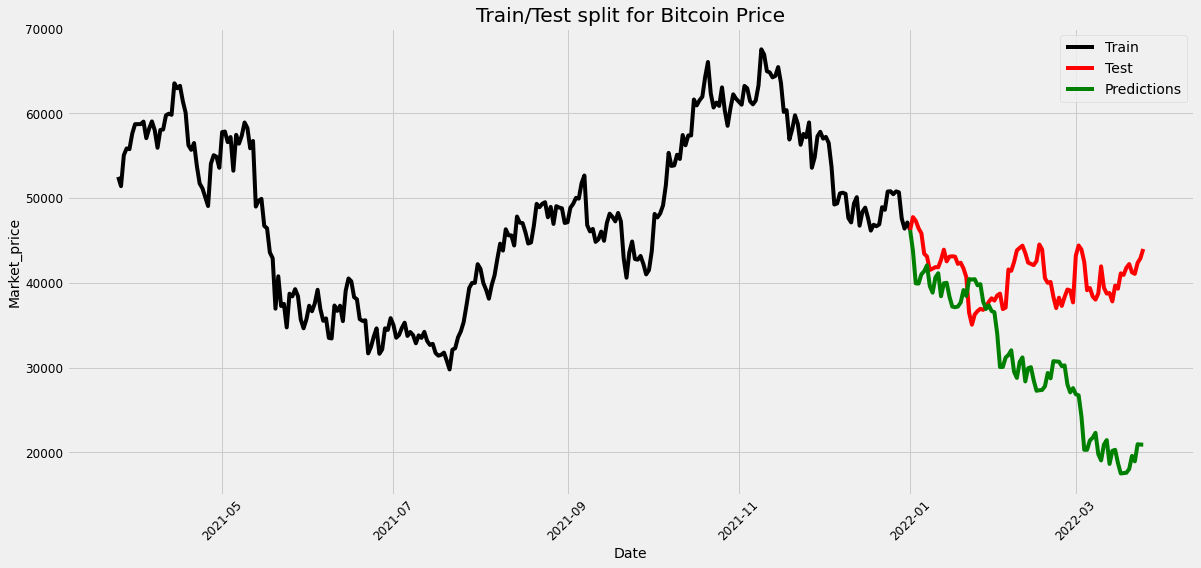

RMSE:  13149.679543973809


In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 0, 30))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

## The above graph shows the highly inaccurate predicition. The RMSE value is 14,112, which tells us that the graph is inaccurate. The prediction line starts near the testing data but ends way below the testing data.

## Q5)

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 0, 30)12 - AIC:6896.675317036195
ARIMA(0, 0, 0)x(0, 0, 1, 30)12 - AIC:5996.136641668399


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 0, 30)12 - AIC:5392.439338345183


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 1, 30)12 - AIC:4754.24797290174


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 0, 30)12 - AIC:5401.778120422718


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 30)12 - AIC:5373.8251095766755


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 0, 30)12 - AIC:4778.387179456952


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 30)12 - AIC:4749.759034773329
ARIMA(0, 0, 1)x(0, 0, 0, 30)12 - AIC:6669.573841282504


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 30)12 - AIC:5917.206678947205


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 0, 30)12 - AIC:5213.824018162732


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 30)12 - AIC:4567.687495103796


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 30)12 - AIC:5942.5787054659995


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 30)12 - AIC:5897.307343915464


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 0, 30)12 - AIC:4628.247779162117


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 30)12 - AIC:4587.558341555581
ARIMA(0, 1, 0)x(0, 0, 0, 30)12 - AIC:5032.643611008863


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 30)12 - AIC:4502.89799408233


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 0, 30)12 - AIC:4668.401311611155


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 30)12 - AIC:4012.8964543303573
ARIMA(0, 1, 0)x(1, 0, 0, 30)12 - AIC:4520.093121624177


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 30)12 - AIC:4504.882609787632


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 0, 30)12 - AIC:4066.5493608284737


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\Py

ARIMA(0, 1, 0)x(1, 1, 1, 30)12 - AIC:4013.4778362754823
ARIMA(0, 1, 1)x(0, 0, 0, 30)12 - AIC:5012.532332418368
ARIMA(0, 1, 1)x(0, 0, 1, 30)12 - AIC:4485.580289749916


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 0, 30)12 - AIC:4647.247803116339


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 30)12 - AIC:4016.153473855404


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 30)12 - AIC:4520.15748387808


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 30)12 - AIC:4487.535263720443


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 30)12 - AIC:4074.4432117610168


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 30)12 - AIC:3997.082729297448
ARIMA(1, 0, 0)x(0, 0, 0, 30)12 - AIC:5051.614685561414


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 30)12 - AIC:4521.922903211751


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 0, 30)12 - AIC:4684.598841131842


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 30)12 - AIC:4067.567447302439


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 30)12 - AIC:4521.908285263091


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 30)12 - AIC:4523.901142461628


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 30)12 - AIC:4074.1583487456664


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 30)12 - AIC:4066.9174738742254
ARIMA(1, 0, 1)x(0, 0, 0, 30)12 - AIC:5034.949201265032


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 30)12 - AIC:4725.24002703945


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 0, 30)12 - AIC:4667.7136281560015


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 30)12 - AIC:4041.2747114067424


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 30)12 - AIC:4521.966400908672


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 30)12 - AIC:4506.706027752915


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 30)12 - AIC:4073.586736740847


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 30)12 - AIC:4041.0549974354058
ARIMA(1, 1, 0)x(0, 0, 0, 30)12 - AIC:5033.207391792401


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 30)12 - AIC:4503.046971122885


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 0, 30)12 - AIC:4667.919400896971


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 30)12 - AIC:4013.292134590917
ARIMA(1, 1, 0)x(1, 0, 0, 30)12 - AIC:4503.014924691398


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 30)12 - AIC:4505.012109119377


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 30)12 - AIC:4046.120799561735


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 30)12 - AIC:4014.488163735873
ARIMA(1, 1, 1)x(0, 0, 0, 30)12 - AIC:5014.118026434246


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 30)12 - AIC:4487.466653473144


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 30)12 - AIC:4646.831238363508


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 30)12 - AIC:3995.518467035075


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 30)12 - AIC:4504.675574490998


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 30)12 - AIC:4488.775508919438


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 30)12 - AIC:4056.4331704145475


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 30)12 - AIC:3996.60956877997


C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


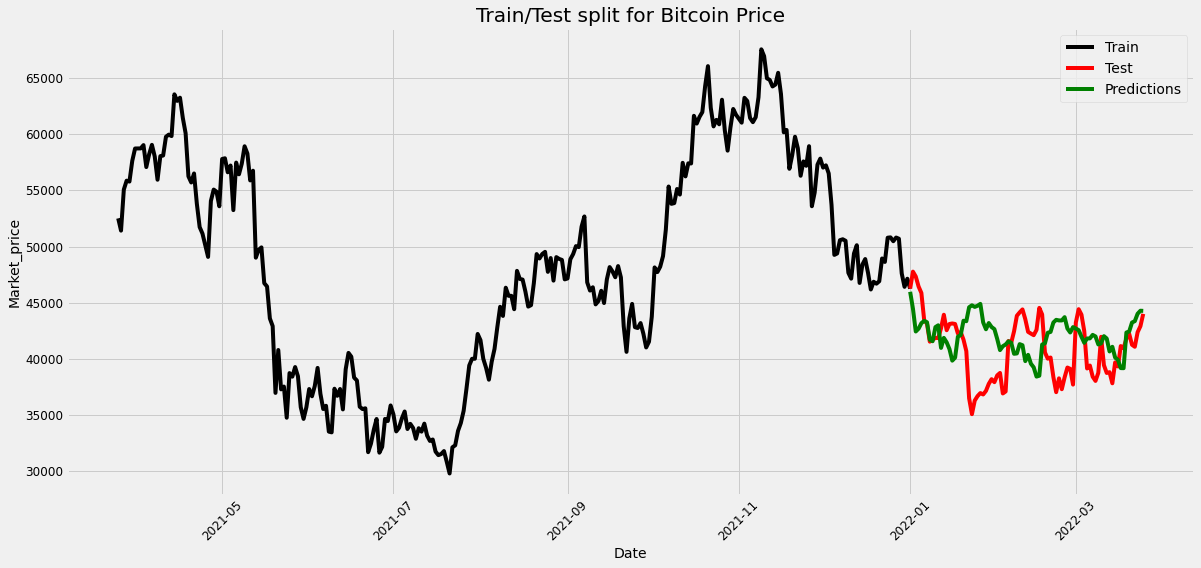

RMSE:  3633.656699324789


In [13]:
SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 1, 30))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

## We can see that the RMSE value has decreased significantly, it was 14,112 before optimization and after optimization, it's 3633. This is also reflected in the graph, the prediction is really close to the testing data which shows how accurate our predictions are to the testing data unlike in the graph plotted before optimization.

## Q6)

In [14]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

In [15]:
# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

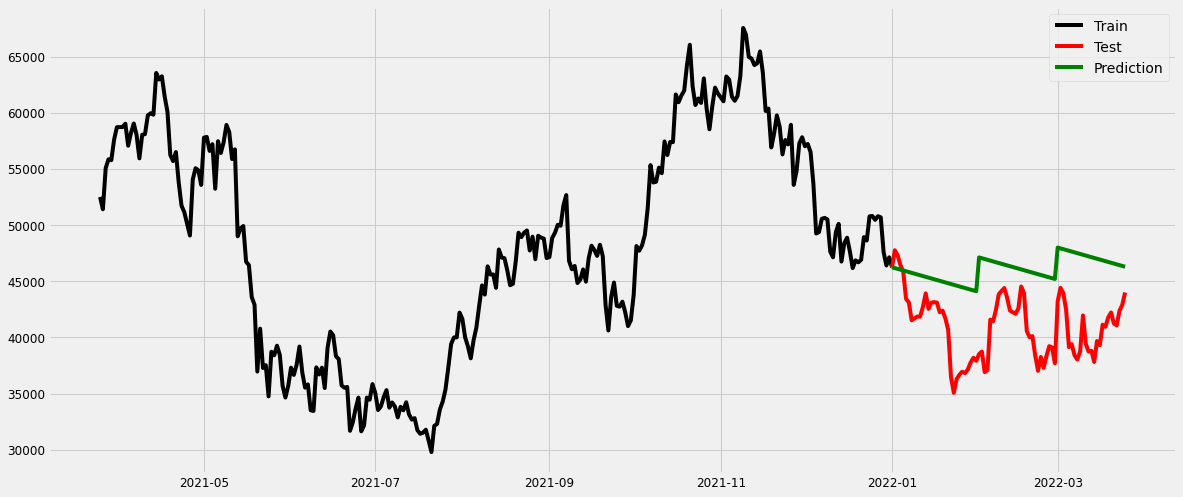

RMSE:  5837.061014310978


In [16]:
from sklearn.linear_model import LinearRegression

# fit the model
rfmodel = LinearRegression()
rfmodel.fit(X, Y)

# predict on the same period
preds = rfmodel.predict(testX)

# plot what has been learned
plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(test.index, preds, color="green", label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ", rf_rmse)

## I've done linear regression and we can still see inaccuracy in the graph, the prediction is nowhere near the testing data which shows us that this isn't an optimal solution.

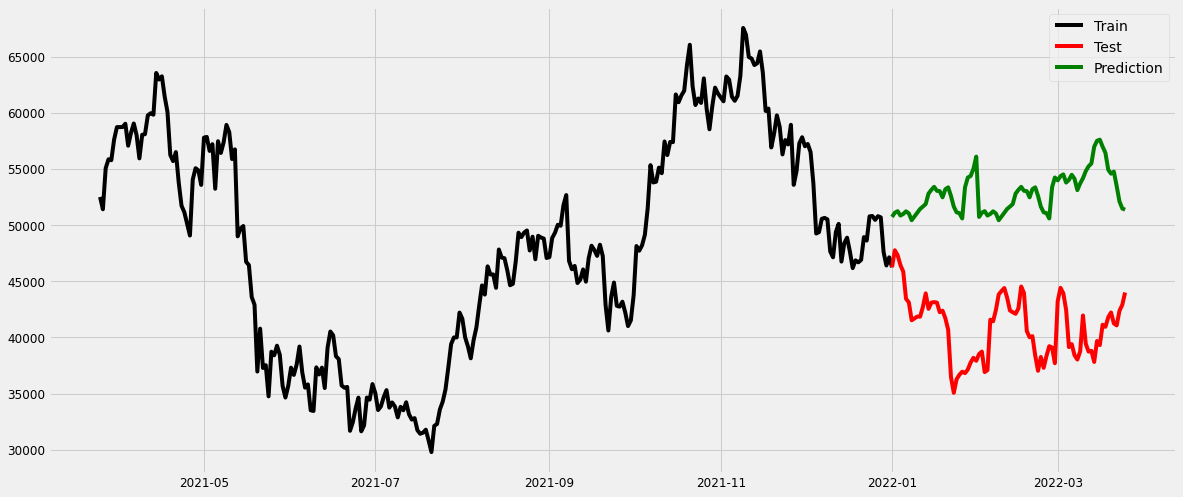

RMSE:  12424.201703628596


In [17]:
from sklearn.ensemble import RandomForestRegressor
 

rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)
 

preds = rfmodel.predict(testX)
 

plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

## The graph above shows that is inaccurate since the prediction line is nowhere near the test data. Moreover, the RMSE value is really high, around 12,472 which backs up my claim on how inaccurate the data is.

## Q7)

## As we can see from all the above graphs plotted, SARIMA is the better option since it has a lower RMSE value compared to all other techniques shown above. The lowest RMSE value we got was 3633 which was from the optimzed version of SARIMA.

## Q8)

In [18]:
dates = pd.date_range(start='01/04/2022', end='30/06/2022')

In [19]:
t_months = [x.month for x in dates]
t_years = [x.year for x in dates]
t_day = [x.day for x in dates]

C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ali Adnan\AppData\Local\Programs\PythonCodingPack\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


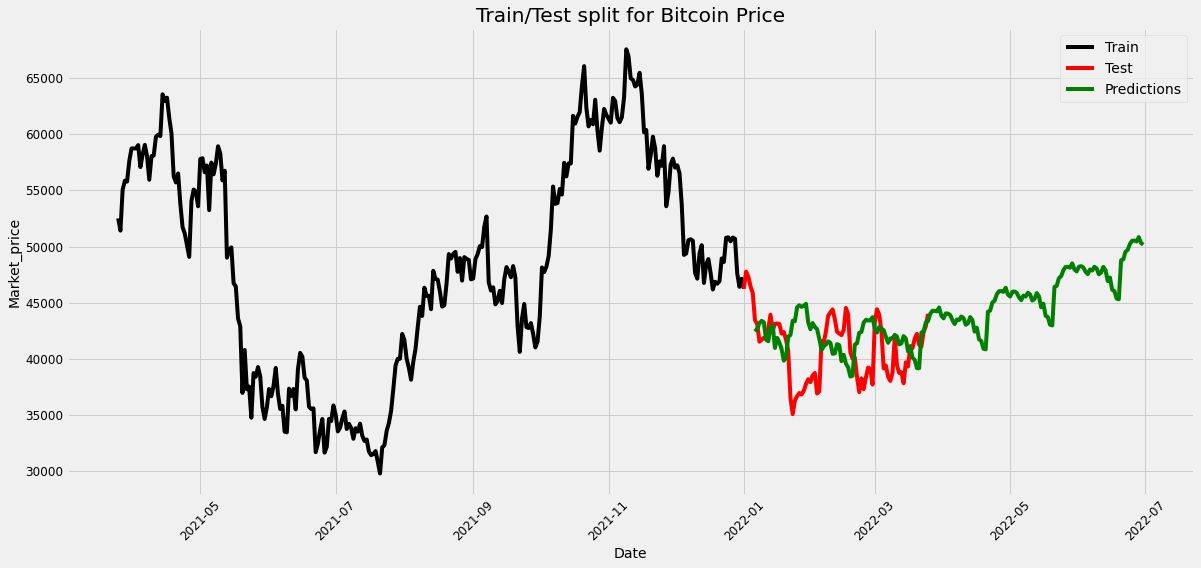

In [20]:
SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 1, 30))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(dates))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start =dates[0], end =dates[-1]) 
y_pred_df.index = dates
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Bitcoin Price")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()



## The value is predicted around 50.5k-51k in 2022-07

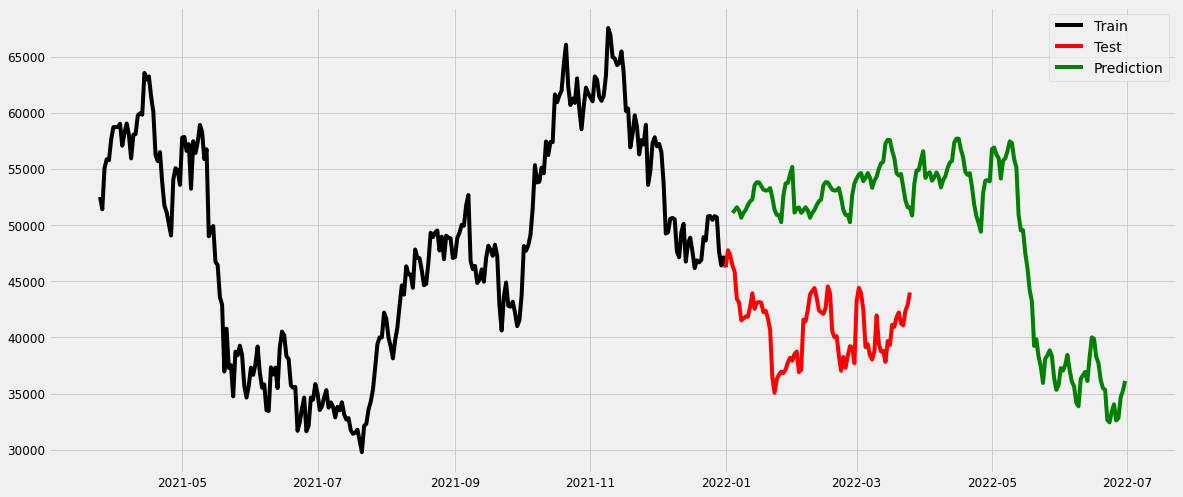

In [21]:
testX = np.array([t_day, t_months, t_years]).T

rfmodel = RandomForestRegressor(random_state=10)
rfmodel.fit(X, Y)

preds = rfmodel.predict(testX)

plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(dates, preds, color="green", label='Prediction')
plt.legend()
plt.show()


## This predicts the value way below the testing data which is around 36k.

# Q10) As we can see from the above two graphs, the SARIMA one is better because it predicts the value more accuractly as compared to Random forest.